In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import numpy as np
from sklearn.metrics import r2_score
import os.path
from os import path

In [2]:
def all_RMSE(result_path, exp_list):
    df = pd.DataFrame()
    for exp in tqdm(range(len(exp_list))):
        train_window, output_size = exp_list[exp]

        rmse_path = glob.glob(result_path + f'/{str(train_window)}_{str(output_size)}/testScores_C.csv')
        try:
            df[f'{str(train_window)}_{str(output_size)}'] = pd.read_csv(rmse_path[0], usecols=['0']).values.flatten()
        except:
            df[f'{str(train_window)}_{str(output_size)}'] = np.NaN

    return df

def all_r2(result_path, exp_list):
    df = pd.DataFrame()
    for exp in tqdm(range(len(exp_list))):
        train_window, output_size = exp_list[exp]

        pred_path = glob.glob(result_path + f'/{str(train_window)}_{str(output_size)}/pred.csv')
        try:
            pred_result = pd.read_csv(pred_path[0])
            df[f'{str(train_window)}_{str(output_size)}'] = [r2_score(pred_result.pred, pred_result.ori)]
        except:
            df[f'{str(train_window)}_{str(output_size)}'] = np.NaN

    return df

In [9]:
def box_plot(df, name):
    df.boxplot(boxprops= dict(color="blue", linewidth=3.0),
               whiskerprops=dict(linewidth=3.0),
               medianprops=dict(color="green", linewidth=2))
    plt.xlabel('input-->forecast (hour)')
    plt.ylabel('Temperature (C) RMSE')
    plt.ylim(0, 6)
#     plt.xticks(size=30, rotation=20)
#     plt.yticks(size=30)
    # plt.xticks(rotation=18)
    plt.title(f'Local Testing RMSE ({name})')
    # plt.legend(fontsize=40, loc=4)  # lower right
    plt.show()
    # plt.savefig('image.png', dpi=300)

In [4]:
def line_plot(fpath):
    # df = pd.DataFrame()
    # df = pd.read_csv(fpath, index_col=['exp'])
    # df[f'{name}_min'] = rmse_df.min().tolist()
    # df[f'{name}_max'] = rmse_df.max().tolist()
    # df.to_csv(r'E:\IoT_HeatIsland_Data\data\zmodel_evaluation\local_RMSE\all_minmax.csv', index=False)

    # color_dict = {'LA_min': 'blue', 'NYC_min': 'orange', 'Atlanta_min': 'green', 'Chicago_min': 'red',
    #               'LA_max': 'blue', 'NYC_max': 'orange', 'Atlanta_max': 'green', 'Chicago_max': 'red'}
    # color_dict = {'LA': 'blue', 'NYC': 'orange', 'Atlanta': 'green', 'Chicago': 'red'}

    df = pd.read_csv(fpath)
    color_dict = {'LA_CHI': 'blue', 'NYC_CHI': 'orange', 'AT_CHI': 'green', 'CHI_CHI': 'red'}

    # use get to specify dark gray as the default color.
    df.plot(color=[color_dict.get(x, '#333333') for x in df.columns], linewidth=5.0)
    plt.xlabel('hour', size=40)
    plt.ylabel('Temperature (C) RMSE', size=40)
    plt.xticks(size=40)
    plt.yticks(size=40)
    plt.legend(fontsize=30, loc=4)
    # plt.xticks(rotation=18)
    plt.title(f'Transfer Learning Hourly RMSE (12h)', size=40)
    plt.show()

In [5]:
city = 'LA'
model_load_path = f'/Volumes/Samsung_T5/IoT_HeatIsland_Data/data/{city}/exp_data/{city}_{city}_12neuron'

experiments = [(24, 1), (24, 4), (24, 8), (24, 12), (36, 12), (48, 12), (72, 12), (48, 24), (72, 36), (96, 48),
               (144, 72), (240, 120)]

100%|██████████| 12/12 [00:00<00:00, 188.72it/s]


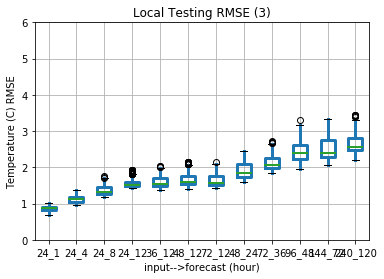

In [10]:
'''RMSE box plot'''
rmse_df = all_RMSE(model_load_path, experiments)
box_plot(rmse_df, city)

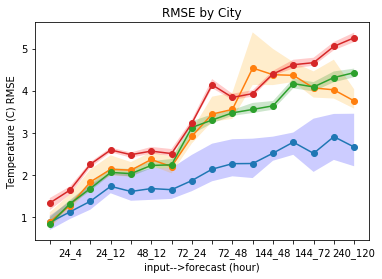

In [12]:
'''RMSE city comparison'''
# rmse_df = all_RMSE(model_load_path, experiments)
# line_plot(city, rmse_df)

path = '/Volumes/Samsung_T5/IoT_HeatIsland_Data/data/zmodel_evaluation/local_RMSE'
rmse_avg = pd.read_csv(path + '/all_avg.csv')
rmse_max = pd.read_csv(path + '/all_max.csv')
rmse_min = pd.read_csv(path + '/all_min.csv')

cities = ['LA', 'NYC', 'AT', 'CHI']
color = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots()
for city in range(len(cities)):
    ax.plot(rmse_avg['exp'],
            rmse_avg[cities[city]],
            '-o',
            label=cities[city])
    ax.fill_between(rmse_avg['exp'],
                    rmse_min[cities[city]],
                    rmse_max[cities[city]],
                    alpha=0.2,
                    facecolor=color[city])
# plt.legend(fontsize=30)
plt.xlabel('input-->forecast (hour)')
plt.ylabel('Temperature (C) RMSE')
# plt.xticks(size=30)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
# plt.yticks(size=30)
plt.title(f'RMSE by City')

plt.show()

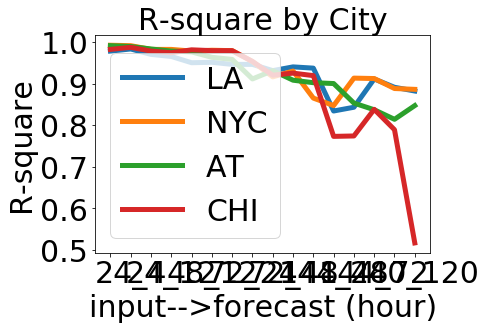

In [8]:
'''R2 city comparison'''

r2 = pd.read_csv(path + '/All_r2.csv')

cities = ['LA', 'NYC', 'AT', 'CHI']
color = ['blue', 'orange', 'green', 'red']

fig, ax = plt.subplots()
for city in range(len(cities)):
    ax.plot(r2['exp'],
            r2[cities[city]],
            '-o',
            label=cities[city],
            linewidth=5.0)

plt.legend(fontsize=30)
plt.xlabel('input-->forecast (hour)', size=30)
plt.ylabel('R-square', size=30)
plt.xticks(size=30)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.yticks(size=30)
plt.title(f'R-square by City', size=30)

plt.show()